# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [5]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [15]:
# Extract all rows of data
table = soup.find('table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [16]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 7:  # Check if it's a data row with 7 columns
        data.append([col.text.strip() for col in cols])

In [17]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(data, columns=columns)

In [18]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [24]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   int32 
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: int32(1), object(6)
memory usage: 94.9+ KB


In [27]:
# Change data types for data analysis
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['min_temp']=df['min_temp'].astype(float)

In [31]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                       object
min_temp                   float64
pressure                    object
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [32]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print("Number of months on Mars:", num_months)

Number of months on Mars: 12


In [33]:
# 2. How many Martian days' worth of data are there?
num_martian_days = df['sol'].nunique()
print("Martian days worth of data:", num_martian_days)

Martian days worth of data: 1867


In [35]:
# 3. What is the average low temperature by month?
monthly_avg_min_temp = df.groupby('month')['min_temp'].mean()
monthly_avg_min_temp

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64

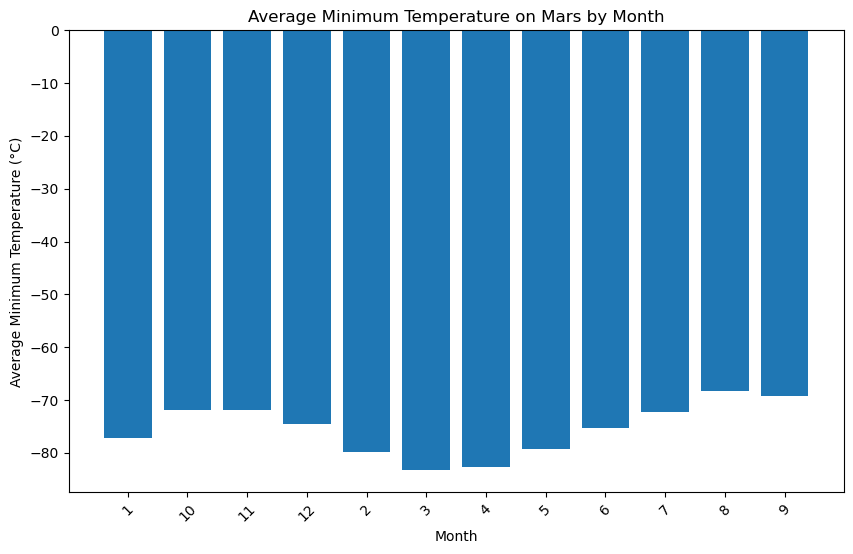

In [36]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_min_temp.index, monthly_avg_min_temp.values)
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Average Minimum Temperature on Mars by Month")
plt.xticks(monthly_avg_min_temp.index, rotation=45)
plt.show()

In [37]:
# Identify the coldest and hottest months in Curiosity's location
monthly_avg_pressure = df.groupby('month')['pressure'].mean()

# Find the month with the lowest and highest atmospheric pressure
lowest_pressure_month = monthly_avg_pressure.idxmin()
highest_pressure_month = monthly_avg_pressure.idxmax()

print("Month with the lowest atmospheric pressure on Mars:", lowest_pressure_month)
print("Month with the highest atmospheric pressure on Mars:", highest_pressure_month)

# Plot the average atmospheric pressure for all months
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_pressure.index, monthly_avg_pressure.values)
plt.xlabel("Month")
plt.ylabel("Average Atmospheric Pressure (Pa)")
plt.title("Average Atmospheric Pressure on Mars by Month")
plt.xticks(monthly_avg_pressure.index, rotation=45)
plt.show()


TypeError: Could not convert 853.0854.0855.0857.0857.0856.0857.0861.0862.0863.0865.0865.0865.0866.0866.0866.0867.0870.0870.0869.0870.0870.0871.0872.0874.0875.0874.0873.0874.0875.0875.0875.0875.0876.0877.0878.0878.0879.0880.0880.0881.0881.0882.0883.0883.0884.0885.0886.0887.0887.0887.0888.0887.0849.0832.0850.0852.0851.0851.0851.0851.0853.0856.0855.0854.0854.0856.0859.0857.0856.0856.0858.0857.0858.0859.0859.0860.0860.0861.0862.0863.0864.0864.0863.0864.0865.0865.0867.0868.0868.0867.0868.0870.0870.0871.0871.0871.0871.0873.0875.0875.0874.0876.0877.0878.0879.0879.0878.0879.0880.0880.0881.0882.0882.0840.0840.0840.0820.0840.0840.0840.0841.0841.0842.0843.0842.0841.0842.0843.0844.0845.0845.0846.0846.0847.0848.0848.0849.0850.0849.0851.0850.0851.0852.0853.0853.0852.0854.0854.0856.0857.0855.0855.0855.0858.0858.0857.0858.0859.0859.0861.0860.0861.0861.0861.0861.0863.0865.0863.0863.0865.0866.0866.0867.0 to numeric

In [38]:
# 4. Average pressure by Martian month
monthly_avg_pressure = df.groupby('month')['pressure'].mean()

TypeError: Could not convert 853.0854.0855.0857.0857.0856.0857.0861.0862.0863.0865.0865.0865.0866.0866.0866.0867.0870.0870.0869.0870.0870.0871.0872.0874.0875.0874.0873.0874.0875.0875.0875.0875.0876.0877.0878.0878.0879.0880.0880.0881.0881.0882.0883.0883.0884.0885.0886.0887.0887.0887.0888.0887.0849.0832.0850.0852.0851.0851.0851.0851.0853.0856.0855.0854.0854.0856.0859.0857.0856.0856.0858.0857.0858.0859.0859.0860.0860.0861.0862.0863.0864.0864.0863.0864.0865.0865.0867.0868.0868.0867.0868.0870.0870.0871.0871.0871.0871.0873.0875.0875.0874.0876.0877.0878.0879.0879.0878.0879.0880.0880.0881.0882.0882.0840.0840.0840.0820.0840.0840.0840.0841.0841.0842.0843.0842.0841.0842.0843.0844.0845.0845.0846.0846.0847.0848.0848.0849.0850.0849.0851.0850.0851.0852.0853.0853.0852.0854.0854.0856.0857.0855.0855.0855.0858.0858.0857.0858.0859.0859.0861.0860.0861.0861.0861.0861.0863.0865.0863.0863.0865.0866.0866.0867.0 to numeric

In [39]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_pressure.index, monthly_avg_pressure.values)
plt.xlabel("Martian Month")
plt.ylabel("Average Atmospheric Pressure (Pa)")
plt.title("Average Atmospheric Pressure on Mars by Martian Month")
plt.xticks(monthly_avg_pressure.index, rotation=45)
plt.show()

NameError: name 'monthly_avg_pressure' is not defined

<Figure size 1000x600 with 0 Axes>

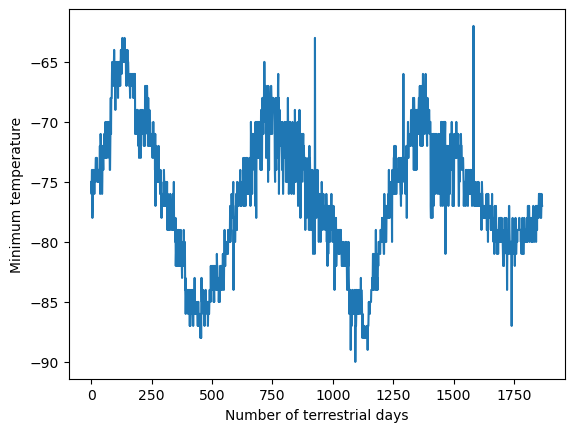

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
earth_days_in_mars_year = num_martian_days / num_months
print("5. Approximate terrestrial days in a Martian year:", earth_days_in_mars_year)

plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'])
plt.xlabel("Terrestrial Date")
plt.ylabel("Minimum Temperature (°C)")
plt.title("5. Daily Minimum Temperature on Mars")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [21]:
browser.quit()